In [1]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from scipy.stats import linregress
from wordcloud import WordCloud

# Importing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\TIRTH
[nltk_data]     JOSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Defining functions
def count_word(file_name):
    with open(file_name, encoding='utf8') as f:
        return Counter(f.read().split())


In [4]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
book_open = open("C:\\Users\\TIRTH JOSHI\\Desktop\\IR\\Ziphs-Law\\829-0.txt", 'r', encoding='mbcs')
data = book_open.read().lower()
words = data.split()
number_of_words = len(words)
print('Number of words in text file :', number_of_words)

Number of words in text file : 108144


In [6]:
# Converting file to include only small letters and formatting it
words = [word.strip('_*-.,!’;:"`()[]') for word in words]
words = [word.strip("'") for word in words]
words = [word.replace("'s", '') for word in words]
words = [word.replace("``", '') for word in words]
words = [word.replace("`s", '') for word in words]
with open(r'words_list.txt', 'w', encoding='utf8') as fp:
    for item in words:
        fp.write("%s\n" % item)

In [7]:
# Applying Potters Stemmer
ps = PorterStemmer()
words = [ps.stem(word) for word in words]
with open(r'stemmer.txt', 'w', encoding='utf8') as fp:
    for item in words:
        fp.write("%s\n" % item)

          Word  Frequency  Log_Freq    Rank
0          the       6150  8.724207     1.0
4           of       3970  8.286521     2.0
19         and       3740  8.226841     3.0
51          to       3530  8.169053     4.0
103          i       2852  7.955776     5.0
...        ...        ...       ...     ...
4020   pernici          1  0.000000  4999.5
4022   earth.”          1  0.000000  4999.5
4024  inquisit          1  0.000000  4999.5
4025   laudabl          1  0.000000  4999.5
6270  newslett          1  0.000000  4999.5

[6271 rows x 4 columns]


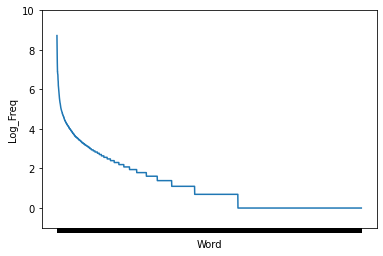

In [8]:
# Graphing frequency of words
word_freq = count_word("stemmer.txt")
df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
df['Log_Freq'] = df['Frequency'].apply(lambda x: np.log(x))
df['Rank'] = df['Frequency'].rank(ascending=False)
df.sort_values(by='Frequency', ascending=False, inplace=True)
print(df)
graph = sns.lineplot(x='Word', y='Log_Freq', data=df)
graph.set(xticklabels=[])
plt.ylim(-1, 10)
plt.savefig('graph.png')
plt.show()

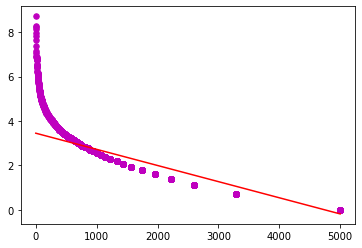

In [9]:
# Linear Regression
fig, ax = plt.subplots()
x_lr = df['Rank'].values
y_lr = df['Log_Freq'].values
plt.scatter(x_lr, y_lr, color="m", marker="o", s=30)
res1 = linregress(x_lr, y_lr)
ax.plot(x_lr, res1.intercept + res1.slope * x_lr, 'r')
plt.savefig('linear_regression.png')
plt.show()

In [10]:
# Printing results of Alpha and k in ln(f) = -(alpha)*ln(r) + k
print("---------------------------------------------------")
print("Alpha =", res1.slope)
print("k =", res1.intercept)
print("---------------------------------------------------")

---------------------------------------------------
Alpha = -0.000728165090994693
k = 3.450367323368913
---------------------------------------------------


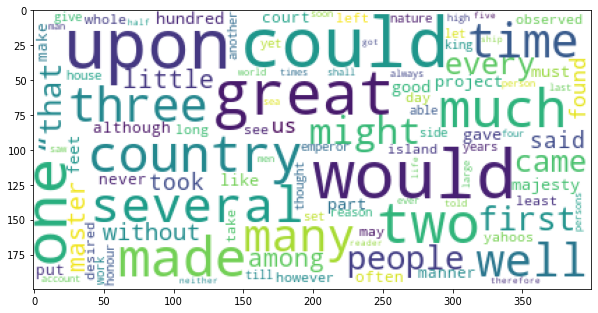

In [15]:
# Making the Word cloud
word_freq = count_word("words_list.txt")
filtered = {}
for word in word_freq:
    if word not in stopwords.words('english'):
        filtered[word] = word_freq[word]
        
word_cloud = WordCloud(background_color='white', max_words=100, max_font_size=50).generate_from_frequencies(filtered)
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(word_cloud)
plt.savefig('word_cloud.png')
plt.show()

In [12]:
# Closing the file
book_open.close()